<a href="https://colab.research.google.com/github/agord1994/MLA_ASG/blob/main/MLA5_ASG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment-5 #  
**Andrew Gordon**  

## Standard Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook. 

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Imports for Splitting Data and Building Pipeline


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

## Problem 1

### Reading the Data

In [ ]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_train.csv')
landsat_test= pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_test.csv')

### Statistical and Visual Exploration

In [ ]:
landsat_train.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [ ]:
landsat_train_= landsat_train["land_type"].groupby(landsat_train["land_type"]).count()
landsat_train_

land_type
1    1072
2     479
3     961
4     415
5     470
7    1038
Name: land_type, dtype: int64

In [ ]:
landsat_test_= landsat_test["land_type"].groupby(landsat_test["land_type"]).count()
landsat_test_

land_type
1    461
2    224
3    397
4    211
5    237
7    470
Name: land_type, dtype: int64

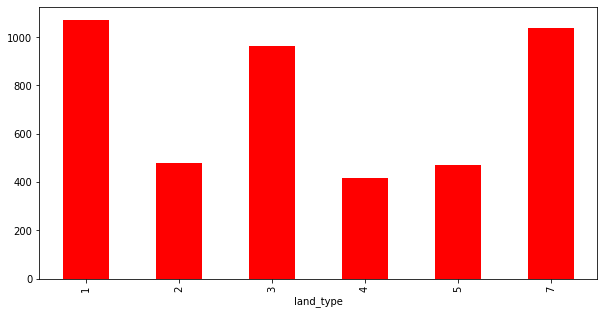

In [ ]:
landsat_train_.plot(kind="bar", color='red',figsize=(10,5)) 

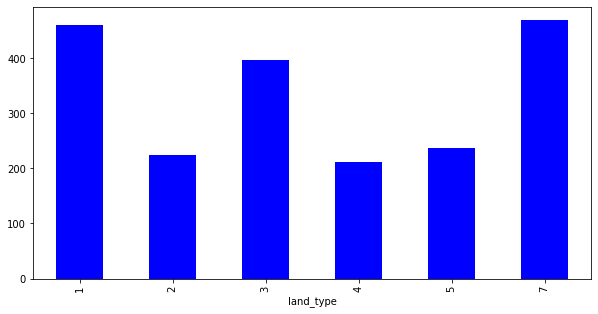

In [ ]:
landsat_test_.plot(kind="bar", color='blue',figsize=(10,5)) 

### Splitting Data into Train/Test

In [ ]:
X_train= landsat_train.iloc[:,0:-1]
X_test=landsat_test.iloc[:,0:-1]
y_train= landsat_train[['land_type']]
y_test= landsat_test[['land_type']]
#

### Building the Pipeline

In [ ]:
num_attribs= ['top_left_r','top_left_g','top_left_infra1','top_left_infra2','top_middle_r','top_middle_g','top_middle_infra1','top_middle_infra2','top_right_r','top_right_g','top_right_infra1','top_right_infra2','middle_left_r','middle_left_g','middle_left_infra1','middle_left_infra2','central_pixel_r','central_pixel_g','central_pixel_infra1','central_pixel_infra2','middle_right_r','middle_right_g','middle_right_infra1','middle_right_infra2','bottom_left_r','bottom_left_g','bottom_left_infra1','bottom_left_infra2','bottom_middle_r','bottom_middle_g','bottom_middle_infra1','bottom_middle_infra2','bottom_right_r','bottom_right_g','bottom_right_infra1','bottom_right_infra2']

In [ ]:
col_transform=ColumnTransformer(transformers=[('num',MinMaxScaler(),num_attribs)], remainder='passthrough')

In [ ]:
random_forest= Pipeline([
    ('transform', col_transform),
    ('rf',RandomForestClassifier(n_estimators=1000, max_samples=500,bootstrap=True,oob_score=True,n_jobs=-1))
])

### Executing the Model

In [ ]:
random_forest.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left...
                                                   'central_pixel_g',
                                                   'central_pixel_infra1',
                                                   'central_pixel_infra2',
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('rf',
                 RandomForestClassifier(max_samples=500, n_estimators=1000,
                                        n_jobs=-1, oob_score=True))])

### Evaluating the Model

In [ ]:
y_pred=random_forest.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.94      0.99      0.96       461
           2       0.98      0.96      0.97       224
           3       0.87      0.95      0.91       397
           4       0.73      0.58      0.65       211
           5       0.91      0.77      0.83       237
           7       0.84      0.87      0.86       470

    accuracy                           0.88      2000
   macro avg       0.88      0.85      0.86      2000
weighted avg       0.88      0.88      0.88      2000



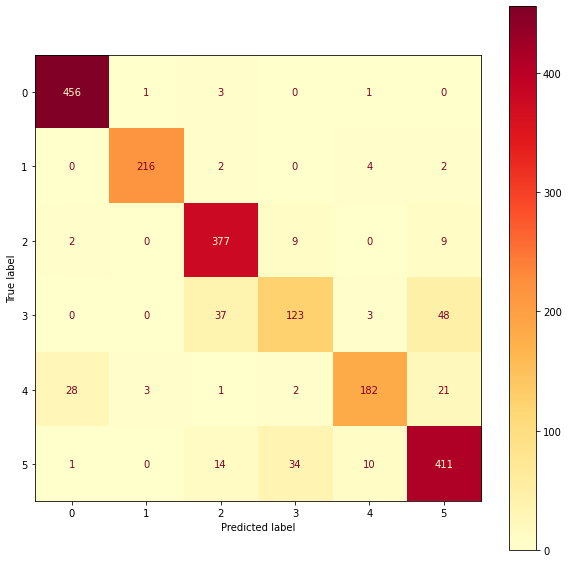

In [ ]:
cm= confusion_matrix(y_test, y_pred)
disp= ConfusionMatrixDisplay(confusion_matrix=cm)

fig,ax=plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap='YlOrRd')

### Conclusion


Looking at the confusion matrix and classification report for the model. The model is able to predict very accurately when land_type is 1,2,3,5 and 7 to a certain extent.  This reflected in the high f-1 scores which are all abovve .80. The problem of this model is when the model tries to predict land_type 4. If you look at label 3 in confusion matrix(this represents land_type 4) 123 instances are predicted correctly with this model, when the classification is incorrect it typically categorizes the land_type as a 7 or 3.

## Problem 2-Voting Classifier



### Splitting Data into Train/Test

used same data and variables from above 

### Building the Pipeline

In [ ]:
knn= KNeighborsClassifier(n_neighbors=3)
lr=LogisticRegression(max_iter=100000)
svc=SVC(kernel="rbf")

In [ ]:
voting=Pipeline([
    ('transform',col_transform),
    ('voting_ensemble',VotingClassifier(
        estimators=[
                  ('knn',knn),
                  ('lr',lr),
                  ('svc',svc)
                   ], voting='hard'))
            
])

### Executing the Model

In [ ]:
voting.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left...
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('voting_ensemble',
                 VotingClassifier(estimators=[('knn',
                                               KNeighborsClassifier(n_neighbors=3)),
                                              ('lr',
                                               LogisticRegression(max_iter=100000)),
                                              ('svc', SVC())]))])

### Evaluating Model

In [ ]:
y_pred=voting.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       461
           2       0.97      0.97      0.97       224
           3       0.87      0.97      0.91       397
           4       0.71      0.55      0.62       211
           5       0.91      0.86      0.89       237
           7       0.84      0.86      0.85       470

    accuracy                           0.89      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.89      0.89      0.89      2000



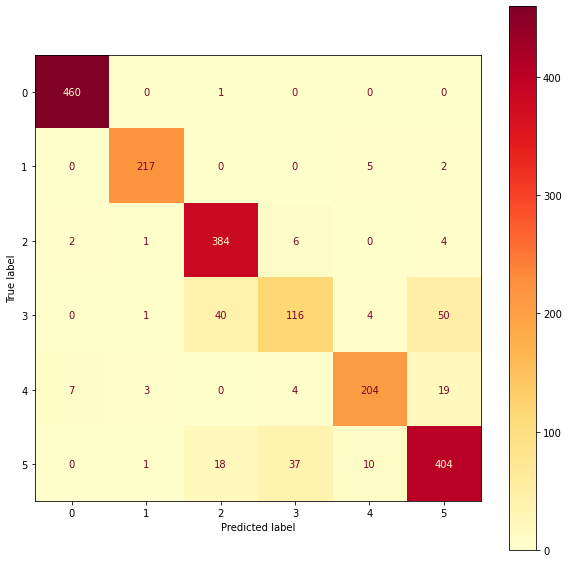

In [ ]:
cm= confusion_matrix(y_test, y_pred)
disp= ConfusionMatrixDisplay(confusion_matrix=cm)

fig,ax=plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap='YlOrRd')

### Conclusion


Using the voting classifier shows some similarities between the random forest classification model. Using the voting classsification increased the f1 scores of some of land_types of 1 and 5.But, the model still struggled to correctly predict land_type 4, which is what the random forest classication model pointed out as well.

## Problem 3-Voting Classifier

### Reading the Data

In [ ]:
df= pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

### Statistical and Visual Exploration

In [ ]:
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
t= df['forgery'].groupby(df['forgery'] ).count()
t

forgery
0    762
1    610
Name: forgery, dtype: int64

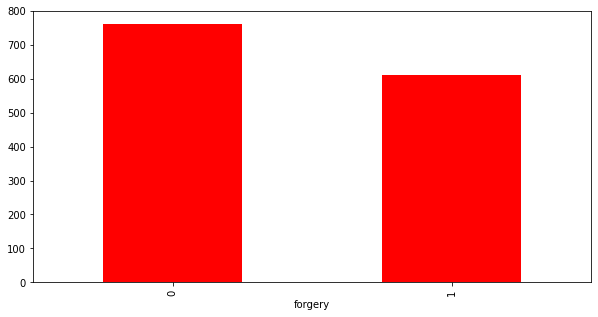

In [ ]:
t.plot(kind="bar", color='red',figsize=(10,5)) #forgeries equal 1

### Splitting Data into Train/Test

In [ ]:
X=df[['variance','skewness','curtosis','entropy']]
y=df['forgery']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=.2,random_state=0)

### Building the Pipeline

In [ ]:
num_attribs= ['variance','skewness','curtosis','entropy']

col_transform=ColumnTransformer(transformers=[('num',MinMaxScaler(),num_attribs)])

In [ ]:
random_forest= Pipeline([
    ('transform', col_transform),
    ('rf',RandomForestClassifier(n_estimators=1000, max_samples=500,bootstrap=True,oob_score=True,n_jobs=-1))
])

### Executing the Model

In [ ]:
random_forest.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('rf',
                 RandomForestClassifier(max_samples=500, n_estimators=1000,
                                        n_jobs=-1, oob_score=True))])

### Evaluating the Model

In [ ]:
y_pred=random_forest.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.98      0.98       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



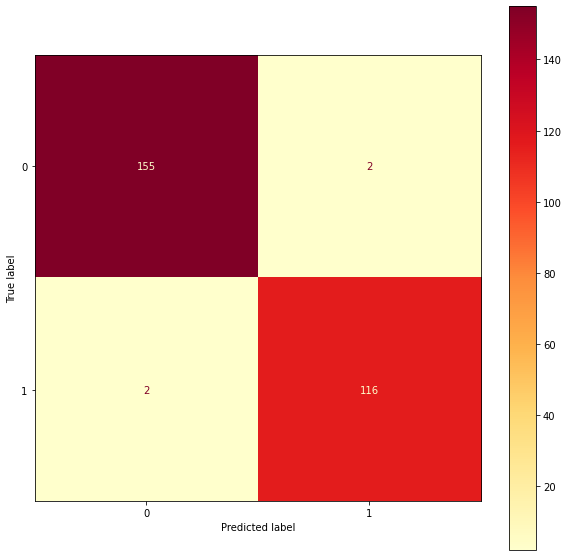

In [ ]:
cm= confusion_matrix(y_test, y_pred)
disp= ConfusionMatrixDisplay(confusion_matrix=cm)

fig,ax=plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap='YlOrRd')

### Conclusion

Looking at the f1 score for this random forest classification model that predicts bank note forgeries, we can see the model is very accurate when comparing to the true values. There were only four instances where the model was incorrect. 